<a href="https://colab.research.google.com/github/hellodoksa/machine-learning-Project/blob/master/KerasDeeplearning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import tensorflow as tf 


# 와인 종류 예측하기 :: 중간에 멈추기 


In [0]:
df_pre = pd.read_csv('./wine.csv')
df= df_pre.sample(frac=1) # 정해진 비율로 랜덤으로 가져와라 

In [0]:
dataset = df.values
x= dataset[:,0:12]
y= dataset[:,12]

In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint , EarlyStopping


In [0]:
model = Sequential()

In [0]:
model.add(Dense(30, input_dim =12 , activation ='relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [0]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy' ,
              optimizer ='adam',
              metrics=['accuracy'])

In [0]:
model.fit(x,y,epochs=200,batch_size=200)

Epoch 1/200
6496/6496 [==============================] - 0s 68us/step - loss: 0.3830 - accuracy: 0.7528
Epoch 2/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.3218 - accuracy: 0.8390
Epoch 3/200
6496/6496 [==============================] - 0s 9us/step - loss: 0.2863 - accuracy: 0.9153
Epoch 4/200
6496/6496 [==============================] - 0s 7us/step - loss: 0.2305 - accuracy: 0.9306
Epoch 5/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.1965 - accuracy: 0.9344
Epoch 6/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.1878 - accuracy: 0.9370
Epoch 7/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.1826 - accuracy: 0.9387
Epoch 8/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.1773 - accuracy: 0.9386
Epoch 9/200
6496/6496 [==============================] - 0s 8us/step - loss: 0.1641 - accuracy: 0.9438
Epoch 10/200
6496/6496 [==============================] - 0s 7us/step - 

In [0]:
import os 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val-loss:4f}.hdf5"

In [0]:
#checkpointer : 모니터할 값을 지정 
# 테스트 오차는 케라스 내부에서 val_loss로 기록됨
checkpointer = ModelCheckpoint(filepath=modelpath , monitor='val_loss' , verbose =1)

In [0]:
model.fit(x,y,validation_split=0.2, epochs=200,batch_size=200,verbose=0,callbacks=[checkpointer])

KeyError: ignored

In [0]:
from keras.callbacks import EarlyStopping 
early_stopping_callback = EarlyStopping(monitor='val_loss' , patience = 100)

In [0]:
model.fit(x,y,validation_split=0.33, epochs=2000, batch_size=500 , callbacks=[early_stopping_callback])

Train on 4352 samples, validate on 2144 samples
Epoch 1/2000
4352/4352 [==============================] - 0s 7us/step - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.0349 - val_accuracy: 0.9925
Epoch 2/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0354 - val_accuracy: 0.9902
Epoch 3/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 4/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0370 - val_accuracy: 0.9907
Epoch 5/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0239 - accuracy: 0.9936 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 6/2000
4352/4352 [==============================] - 0s 6us/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.0422 - val_accuracy: 0.9916
Epoch 7/2000
4352/4352 [==============================] - 0s 6us/step - loss

#  CNN의 Hello world - MNIST 


In [0]:
from keras.datasets import mnist
from keras.utils import np_utils # 원핫인코딩
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten , Conv2D , MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping 

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import os 
import tensorflow as tf 

In [0]:
#seed 값 설정 
seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)

- 데이터 불러오기 

11493376/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

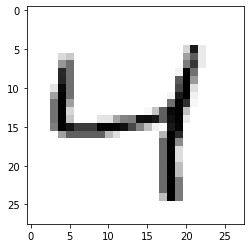

In [0]:
(x_train ,  y_class_train) , (x_test , y_clsas_test) = mnist.load_data()

plt.imshow(x_train[2] , cmap='Greys')
plt.show

In [0]:
# 2차원 배열인 이미지의 픽셀 값을 1차원 배열로 바꿔줘야함 
#reshape(총 샘플 수 , 1차원 속성 수 )
#keras는 데이터를 0에서 1 사이의 값으로 변환하여 구동할때 최적의 성능을 보인다.
# 따라서 정규화 해야한다. (0~1)
x_train = x_train.reshape(x_train.shape[0] , 28,28,1).astype('float32') / 255 
x_test = x_test.reshape(x_test.shape[0] , 28,28,1).astype('float32') / 255

In [0]:
#y class를 원핫 인코딩해야함 
y_train = np_utils.to_categorical(y_class_train,10)
y_test = np_utils.to_categorical(y_clsas_test,10)

- 컨볼루션 신경망 설정 


In [0]:
# 입력값이 784개 / 은닉층이 512개 / 출력이 10개 
model = Sequential()
#input_shape = (행,열,색상 혹은 흑백 )
model.add(Conv2D(32, kernel_size= (3,3) , input_shape = (28,28,1) , activation='relu'))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPooling2D(pool_size= 2)) # 풀링 창 , 2로 정하면 절반으로 줄어듬 

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128 ,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax')) # 출력이 10개 


In [0]:
model.compile(loss = 'categorical_crossentropy' ,optimizer='adam' , metrics=['accuracy'])

- 모델 최적화 설정 

In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
  os.mkdir(MODEL_DIR)
model_path = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

  # 가장 좋은 모델만 저장해라 
check_pointer = ModelCheckpoint(filepath=model_path,monitor='val_loss' , verbose =1 , save_best_only=True) 
early_stopping_callback_ = EarlyStopping(monitor='val_loss' , patience=10)

- 모델의 실행 

In [0]:
history = model.fit(x_train , y_train, validation_data=(x_test,y_test) ,epochs= 50 , batch_size=200 , verbose=0, callbacks =[early_stopping_callback_])
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test,y_test)[1]))                  

- 오차 그래프로 표현

In [0]:
# 테스트셋의 오차 
y_vloss = history.history['val_loss']

#학습셋의 오차 
y_loss = history.history['loss']

## cf. acc : 학습 정확도 
## val_acc : 테스트셋 정확도 
## loss  : 학습셋 오차 
## val_loss  : 테스트셋 오차 

In [0]:
# 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plt(x_len , y_vloss , marker=',' , c='red' , label='TestSet_loss')
plt.plt(x_len , y_loss , marker=',' , c='blue' , label='TrainSet_loss')

#그래프에 그리드르 주고 레이블을 표시 
plt.legend(loc ='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()